#### LangChain Essentials Course

# Getting Started with LangChain

LangChain is one of the most popular open source libraries for AI Engineers. It's goal is to abstract away the complexity in building AI software, provide easy-to-use building blocks, and make it easier when switching between AI service providers.

In this example, we will introduce LangChain, building a simple LLM-powered assistant. We'll provide examples for both OpenAI's `gpt-4o-mini` *and* Meta's `llama3.2` via Ollama!

## Choosing your Model

This example is split into two versions, this version uses Ollama - allowing us to run our LLM locally without needing any external services or API keys. The [OpenAI version](https://github.com/aurelio-labs/agents-course/blob/main/04-langchain-ecosystem/01-langchain-essentials/01-langchain-intro-openai.ipynb) uses the OpenAI API and requires an OpenAI API key.

## Initializing OpenAI's gpt-4o-mini

We start by initializing the OpenAI model, fine-tuned for instruction following. We `pull` the model from OpenAI by switching to our terminal and executing:

```
pip install openai
```

Once the model libary has finished downloading, we initialize it in LangChain using the `ChatOpenAI` class:

In [3]:
import os
from getpass import getpass

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY") or getpass(
    "Enter OpenAI API Key: "
)

openai_model = "gpt-4o-mini"

In [478]:
from langchain.chat_models import ChatOpenAI

# For normal accurate responses
llm = ChatOpenAI(temperature=0.0, model=openai_model)

# For unique creative responses
creative_llm = ChatOpenAI(temperature=0.9, model=openai_model)

So the task at hand is to add any article into the 'article' variable, then we want to create four core pieces from this article:

1. Article title
2. Article description
3. One additional paragraph in the article
4. One image to go along with the article

Here we can input our article to start us of with, currently this is using AI's Agent Course Breif by James Briggs

In [479]:
article = """
\
We believe AI's short—to mid-term future belongs to agents and that the long-term future of *AGI* may evolve from agentic systems. Our definition of agents covers any neuro-symbolic system in which we merge neural AI (such as an LLM) with semi-traditional software.

With agents, we allow LLMs to integrate with code — allowing AI to search the web, perform math, and essentially integrate into anything we can build with code. It should be clear the scope of use cases is phenomenal where AI can integrate with the broader world of software.

In this introduction to AI agents, we will cover the essential concepts that make them what they are and why that will make them the core of real-world AI in the years to come.

---

## Neuro-Symbolic Systems

Neuro-symbolic systems consist of both neural and symbolic computation, where:

- Neural refers to LLMs, embedding models, or other neural network-based models.
- Symbolic refers to logic containing symbolic logic, such as code.

Both neural and symbolic AI originate from the early philosophical approaches to AI: connectionism (now neural) and symbolism. Symbolic AI is the more traditional AI. Diehard symbolists believed they could achieve true AGI via written rules, ontologies, and other logical functions.

The other camp were the connectionists. Connectionism emerged in 1943 with a theoretical neural circuit but truly kicked off with Rosenblatt's perceptron paper in 1958 [1][2]. Both of these approaches to AI are fascinating but deserve more time than we can give them here, so we will leave further exploration of these concepts for a future chapter.

Most important to us is understanding where symbolic logic outperforms neural-based compute and vice-versa.

| Neural | Symbolic |
| --- | --- |
| Flexible, learned logic that can cover a huge range of potential scenarios. | Mostly hand-written rules which can be very granular and fine-tuned but hard to scale. |
| Hard to interpret why a neural system does what it does. Very difficult or even impossible to predict behavior. | Rules are written and can be understood. When unsure why a particular ouput was produced we can look at the rules / logic to understand. |
| Requires huge amount of data and compute to train state-of-the-art neural models, making it hard to add new abilities or update with new information. | Code is relatively cheap to write, it can be updated with new features easily, and latest information can often be added often instantaneously. |
| When trained on broad datasets can often lack performance when exposed to unique scenarios that are not well represented in the training data. | Easily customized to unique scenarios. |
| Struggles with complex computations such as mathematical operations. | Perform complex computations very quickly and accurately. |

Pure neural architectures struggle with many seemingly simple tasks. For example, an LLM *cannot* provide an accurate answer if we ask it for today's date.

Retrieval Augmented Generation (RAG) is commonly used to provide LLMs with up-to-date knowledge on a particular subject or access to proprietary knowledge.

### Giving LLMs Superpowers

By 2020, it was becoming clear that neural AI systems could not perform tasks symbolic systems typically excelled in, such as arithmetic, accessing structured DB data, or making API calls. These tasks require discrete input parameters that allow us to process them reliably according to strict written logic.

In 2022, researchers at AI21 developed Jurassic-X, an LLM-based "neuro-symbolic architecture." Neuro-symbolic refers to merging the "neural computation" of large language models (LLMs) with more traditional (i.e. symbolic) computation of code.

Jurassic-X used the Modular Reasoning, Knowledge, and Language (MRKL) system [3]. The researchers developed MRKL to solve the limitations of LLMs, namely:

- Lack of up-to-date knowledge, whether that is the latest in AI or something as simple as today's date.
- Lack of proprietary knowledge, such as internal company docs or your calendar bookings.
- Lack of reasoning, i.e. the inability to perform operations that traditional software is good at, like running complex mathematical operations.
- Lack of ability to generalize. Back in 2022, most LLMs had to be fine-tuned to perform well in a specific domain. This problem is still present today but far less prominent as the SotA models generalize much better and, in the case of MRKL, are able to use tools relatively well (although we could certainly take the MRKL solution to improve tool use performance even today).

MRKL represents one of the earliest forms of what we would now call an agent; it is an LLM (neural computation) paired with executable code (symbolic computation).

## ReAct and Tools

There is a misconception in the broader industry that an AI agent is an LLM contained within some looping logic that can generate inputs for and execute code functions. This definition of agents originates from the huge popularity of the ReAct agent framework and the adoption of a similar structure with function/tool calling by LLM providers such as OpenAI, Anthropic, and Ollama.

![ReAct agent flow with the Reasoning-Action loop [4]. When the action chosen specifies to use a normal tool, the tool is used and the observation returned for another iteration through the Reasoning-Action loop. To return a final answer to the user the LLM must choose action "answer" and provide the natural language response, finishing the loop.](/images/posts/ai-agents/ai-agents-00.png)

<small>ReAct agent flow with the Reasoning-Action loop [4]. When the action chosen specifies to use a normal tool, the tool is used and the observation returned for another iteration through the Reasoning-Action loop. To return a final answer to the user the LLM must choose action "answer" and provide the natural language response, finishing the loop.</small>

Our "neuro-symbolic" definition is much broader but certainly does include ReAct agents and LLMs paired with tools. This agent type is the most common for now, so it's worth understanding the basic concept behind it.

The **Re**ason **Act**ion (ReAct) method encourages LLMs to generate iterative *reasoning* and *action* steps. During *reasoning,* the LLM describes what steps are to be taken to answer the user's query. Then, the LLM generates an *action,* which we parse into an input to some executable code, which we typically describe as a tool/function call.

![ReAct method. Each iteration includes a Reasoning step followed by an Action (tool call) step. The Observation is the output from the previous tool call. During the final iteration the agent calls the answer tool, meaning we generate the final answer for the user.](/images/posts/ai-agents/ai-agents-01.png)

<small>ReAct method. Each iteration includes a Reasoning step followed by an Action (tool call) step. The Observation is the output from the previous tool call. During the final iteration the agent calls the answer tool, meaning we generate the final answer for the user.</small>

Following the reason and action steps, our action tool call returns an observation. The logic returns the observation to the LLM, which is then used to generate subsequent reasoning and action steps.

The ReAct loop continues until the LLM has enough information to answer the original input. Once the LLM reaches this state, it calls a special *answer* action with the generated answer for the user.

## Not only LLMs and Tool Calls

LLMs paired with tool calling are powerful but far from the only approach to building agents. Using the definition of neuro-symbolic, we cover architectures such as:

- Multi-agent workflows that involve multiple LLM-tool (or other agent structure) combinations.
- More deterministic workflows where we may have set neural model-tool paths that may fork or merge as the use case requires.
- Embedding models that can detect user intents and decide tool-use or LLM selection-based selection in vector space.

These are just a few high-level examples of alternative agent structures. Far from being designed for niche use cases, we find these alternative options to frequently perform better than the more common ReAct or Tool agents. We will cover all of these examples and more in future chapters.

---

Agents are fundamental to the future of AI, but that doesn't mean we should expect that future to come from agents in their most popular form today. ReAct and Tool agents are great and handle many simple use cases well, but the scope of agents is much broader, and we believe thinking beyond ReAct and Tools is key to building future AI.

---

You can sign up for the [Aurelio AI newsletter](https://b0fcw9ec53w.typeform.com/to/w2BDHVK7) to stay updated on future releases in our comprehensive course on agents.

---

## References

[1] The curious case of Connectionism (2019) [https://www.degruyter.com/document/doi/10.1515/opphil-2019-0018/html](https://www.degruyter.com/document/doi/10.1515/opphil-2019-0018/html)

[2] F. Rosenblatt, [The Perceptron: A Probabilistic Model for Information Storage and Organization in the Brain](https://www.ling.upenn.edu/courses/cogs501/Rosenblatt1958.pdf) (1958), Psychological Review

[3] E. Karpas et al. [MRKL Systems: A Modular, Neuro-Symbolic Architecture That Combines Large Language Models, External Knowledge Sources and Discrete Reasoning](https://arxiv.org/abs/2205.00445) (2022), AI21 Labs
"""

## Preparing our Prompts

LangChain comes with several prompt classes and methods for organizing or constructing our prompts. We will cover these in more detail in later examples, but for now we'll cover the essentials that we need here.

Prompts for chat agents are at a minimum broken up into three components, those are:

* System prompt: this provides the instructions to our LLM on how it must behave, what it's objective is, etc.

* User prompt: this is a user written input.

* AI prompt: this is the AI generated output. When representing a conversation, previous generations will be inserted back into the next prompt and become part of the broader _chat history_.

```
You are a helpful AI assistant, you will do XYZ.    | SYSTEM PROMPT

User: Hi, what is the capital of Australia?         | USER PROMPT
AI: It is Canberra                                  | AI PROMPT
User: When is the best time to visit?               | USER PROMPT
```

LangChain provides us with _templates_ for each of these prompt types. By using templates we can insert different inputs to the template, modifying the prompt based on the provided inputs.

Let's initialize our system and user prompt first:

In [480]:
from langchain.prompts import SystemMessagePromptTemplate, HumanMessagePromptTemplate

# Defining the system prompt (how the AI should act)
system_prompt = SystemMessagePromptTemplate.from_template(
    "You are an AI assistant that helps generate article titles."
)

# the user prompt is provided by the user, in this case however the only dynamic
# input is the article
user_prompt = HumanMessagePromptTemplate.from_template(
"""You are tasked with creating a name for a article.
The article is here for you to examine {article}

Generate 10 unique names for the article. 
The names should be based of the context of the article. 
Be creative, but make sure the names are clear, catchy, 
and relevant to the theme of the context.

Compare all the names, and decide which name is best based on
How catchy the name is, How creative the name is, and how relevant the name is.

only output the best name as:
Article Name: ...""", 
input_variables=["article"]


)

We can display what our formatted human prompt would look like after inserting a value into the `article` parameter:

In [481]:
user_prompt.format(article="TEST STRING")

HumanMessage(content='You are tasked with creating a name for a article.\nThe article is here for you to examine TEST STRING\n\nGenerate 10 unique names for the article. \nThe names should be based of the context of the article. \nBe creative, but make sure the names are clear, catchy, \nand relevant to the theme of the context.\n\nCompare all the names, and decide which name is best based on\nHow catchy the name is, How creative the name is, and how relevant the name is.\n\nonly output the best name as:\nArticle Name: ...', additional_kwargs={}, response_metadata={})

We have our system and user prompts, we can merge both into our full chat prompt using the `ChatPromptTemplate`:

In [482]:
from langchain.prompts import ChatPromptTemplate

first_prompt = ChatPromptTemplate.from_messages([system_prompt, user_prompt])

By default, the `ChatPromptTemplate` will read the `input_variables` from each of the prompt templates inserted and allow us to use those input variables when formatting the full chat prompt template:

In [483]:
print(first_prompt.format(article="TEST STRING"))

System: You are an AI assistant that helps generate article titles.
Human: You are tasked with creating a name for a article.
The article is here for you to examine TEST STRING

Generate 10 unique names for the article. 
The names should be based of the context of the article. 
Be creative, but make sure the names are clear, catchy, 
and relevant to the theme of the context.

Compare all the names, and decide which name is best based on
How catchy the name is, How creative the name is, and how relevant the name is.

only output the best name as:
Article Name: ...


`ChatPromptTemplate` also prefixes each individual message with it's role, ie `System:`, `Human:`, or `AI:`.

We can pull together our first prompt template and the `llm` object we defined earlier to create a simple `LLMChain` which chains together the steps **prompt formatting > llm generation > get output**.

In [484]:
from langchain.chains import LLMChain

chain_one = LLMChain(
    llm=creative_llm,  # for more creativity we use the LLM with temperature 0.9
    prompt=first_prompt, 
    output_key="article_title"  # specifies the output key for what our LLM generates
)

Our first chain creates the article title, note: we can run all of these individually...

But we will actually chain this step with multiple other `LLMChain` steps. So, to continue, our next step is to summarize the article using both the `article` and newly generated `article_title` values, from which we will output a new `summary` variable:

In [486]:
second_user_prompt = HumanMessagePromptTemplate.from_template(
    """You are tasked with creating a description for the article.
The article is here for you to examine {article}
Here is the name of the article {article_title}
Follow these steps carefully but dont put the steps in the final output:

Step 1:
Summarise the content of the article.
The description should be 2 sentences long, 

Step 2:
format the output the summary generated as
Article Summary: ...""",
    input_variables=["article", "article_title"]
)

second_prompt = ChatPromptTemplate.from_messages([
    system_prompt,
    second_user_prompt
])
# chain 2: inputs: article / article title outputs: summary
chain_two = LLMChain(
    llm=llm,  # we use the more deterministic LLM here
    prompt=second_prompt, 
    output_key="summary"
)

The third step will consume just our first `article` variable and then output a new `article_para` variable.

In [487]:
third_user_prompt = HumanMessagePromptTemplate.from_template(
     """You are tasked with creating a new paragraph for the article.
The article is here for you to examine {article}
Follow these steps carefully but dont put the steps in the final output:

Find 5 key areas the article does not talk about.
Compare each key area and decide which is most related to the subject of the context.
Generate a new paragraph of the most related key area in the same style as the context.

only output the final paragraph formatted as:
Article Paragraph: ...""",
)

# prompt template 3: creating a new paragraph for the article
third_prompt = ChatPromptTemplate.from_messages([
    system_prompt,
    third_user_prompt
])
# chain 3: inputs: article / output: article_para
chain_three = LLMChain(
    llm=creative_llm, prompt=third_prompt,
    output_key="article_para"
)

Finally, our fourth step will insert our new paragraph into the original article. It consumes `article_para` and `article`, then outputs `new_suggestion_article`.

In [488]:
fourth_user_prompt = HumanMessagePromptTemplate.from_template(
    """You are tasked with adding a new paragraph for the article.
    
The article is here for you to examine {article}
The new paragraph is also here for you to examine {article_para}

Find the line the article paragraph should come after and discuss why is should be placed there.

format this as
Article Paragraph Line: ..."""
)

fourth_prompt = ChatPromptTemplate.from_messages([
    system_prompt,
    fourth_user_prompt
])
# chain 4: inputs: song, new_verse / outputs: new_song
chain_four = LLMChain(
    llm=llm,  # we need precision here so we use the more deterministic LLM
    prompt=fourth_prompt,
    output_key="new_suggestion_article"
)

Now we want this article to look appealing, so we need to grab an image based of our article! However the prompt for the article image `cannot be over 1000 letters` so this has to be short in case we want to add anything in such as `style` later on.

In [489]:
from langchain.chains import LLMChain
from langchain_community.utilities.dalle_image_generator import DallEAPIWrapper
from langchain_core.prompts import PromptTemplate

image_prompt = PromptTemplate(
    input_variables=["article"],
    template="Generate a prompt with less then 500 letters to generate an image based on the following article: {article}",
)
chain_five = LLMChain(llm=llm, prompt=image_prompt, output_key="article_image")

Here is a function that we will use to generate the article image once we have the prompt from our `article_chain`.

In [490]:
from skimage import io
import matplotlib.pyplot as plt

def generate_and_display_image(image_prompt):
    image_url = DallEAPIWrapper().run(result['article_image'])
    image_data = io.imread(image_url)

    # And update the display code to:
    plt.imshow(image_data)
    plt.axis('off')
    plt.show()

Now we have all our individual `LLMChain` steps ready we can _chain_ them together to create an end-to-end sequential chain. We use the `SequentialChain` to ensure each of our chains are run in sequence, which is required as most of our chains require input variables that are generated by previous chains.

In [491]:
from langchain.chains import SequentialChain

article_chain = SequentialChain(
    chains=[chain_one, chain_two, chain_three, chain_four, chain_five],  # our linked chains
    input_variables=["article"],  # the single input variable (used by our first chain)
    output_variables=["article_title","summary","article_para", "new_suggestion_article", "article_image"],  # all of the outputs we want to return
    verbose=True  # to show AI intermediate steps
)

Now we can run our full chain using `invoke`, providing our single `article` input variable.

And we can also generate and display our new image generated from the context of the article itself!



> Entering new SequentialChain chain...

> Finished chain.


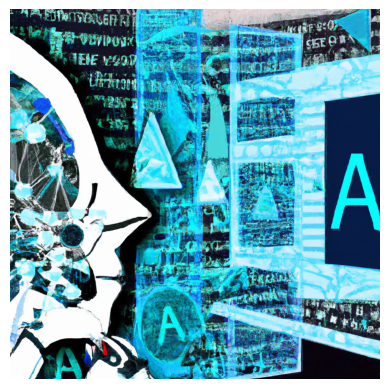

In [494]:
result = article_chain.invoke({"article": article})
generate_and_display_image(result['article_image'])

In [495]:
result

{'article': '\nWe believe AI\'s short—to mid-term future belongs to agents and that the long-term future of *AGI* may evolve from agentic systems. Our definition of agents covers any neuro-symbolic system in which we merge neural AI (such as an LLM) with semi-traditional software.\n\nWith agents, we allow LLMs to integrate with code — allowing AI to search the web, perform math, and essentially integrate into anything we can build with code. It should be clear the scope of use cases is phenomenal where AI can integrate with the broader world of software.\n\nIn this introduction to AI agents, we will cover the essential concepts that make them what they are and why that will make them the core of real-world AI in the years to come.\n\n---\n\n## Neuro-Symbolic Systems\n\nNeuro-symbolic systems consist of both neural and symbolic computation, where:\n\n- Neural refers to LLMs, embedding models, or other neural network-based models.\n- Symbolic refers to logic containing symbolic logic, su